# Advanced Predictive Modeling on the California Housing Dataset

In [1]:
# imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the CSV file and creating dataframe

In [2]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/housing.csv", index_col=0)
df.reset_index(inplace=True)


In [3]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

## Data cleaning

In [4]:
df.isnull().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
False      False     False               False        False           False       False       False          False               False              20433
                                                      True            False       False       False          False               False                207
Name: count, dtype: int64

In [5]:
df.total_bedrooms.isnull().value_counts()

total_bedrooms
False    20433
True       207
Name: count, dtype: int64

We have 207 missing values for total_bedrooms. For this we can just remove those (rows) from the dataframe. 

In [6]:
#drop the rows using index where the total_bedrooms value is null
df.drop(df[df.total_bedrooms.isnull() == True].index, axis=0, inplace=True)

In [7]:
df.reset_index(drop=True)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                25.0       1665.0           374.0   
20429    -121.21     39.49                18.0        697.0           150.0   
20430    -121.22     39.43                17.0       2254.0           485.0   
20431    -121.32     39.43                18.0       1860.0           409.0   
20432    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20428       845.0       330.0         1.5603             78100.0   
20429       356.0       114.0         2.5568             77100.0   
20430      1007.0       433.0         1.7000             92300.0   
20431       741.0       349.0         1.8672             84700.0   
20432      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20428          INLAND  
20429          INLAND  
20430          INLAND  
20431          INLAND  
20432          INLAND  

[20433 rows x 10 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


We have a cleaner data however the data type of ocean_proximity is different to other column so we need to change or remove the column

In [9]:
#check for values
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
# Perform one-hot encoding if 'ocean_proximity' is present in your DataFrame
if 'ocean_proximity' in df.columns:
    # Perform one-hot encoding
     df1=pd.get_dummies(df, columns=['ocean_proximity'])

else:
    print("Column 'ocean_proximity' not found in DataFrame.")


In [11]:
print(df1.head)

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

Now our data is all cleaned and ready for data visualization and data analysis.

## Analysing DATA


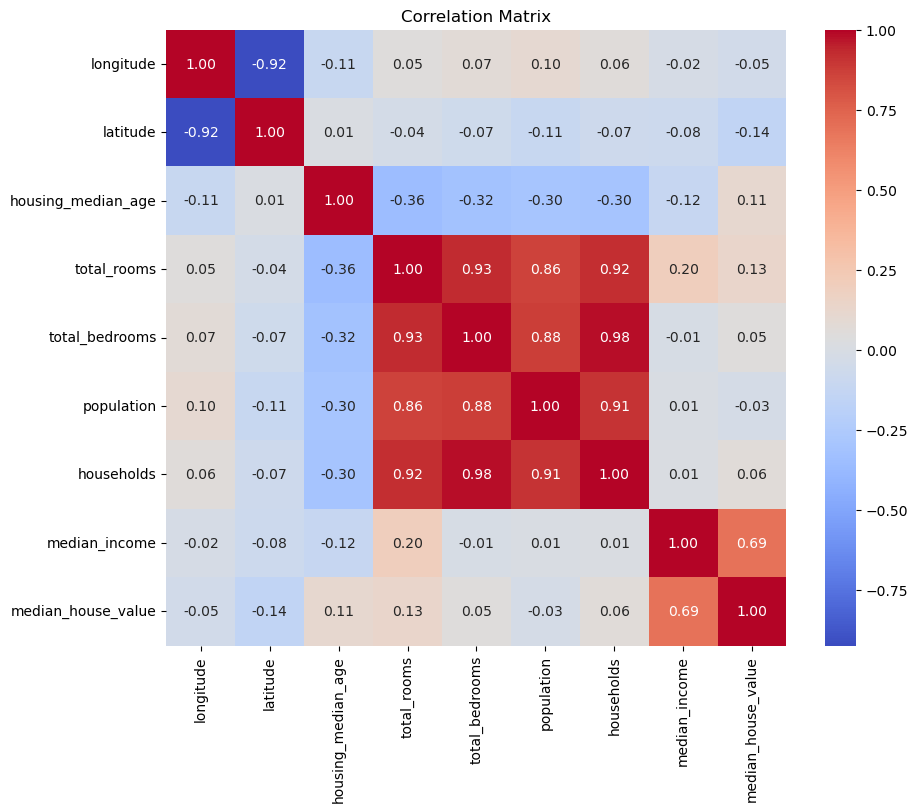

In [12]:
# Compute the correlation matrix
numerical_features = ['longitude','latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

correlation_matrix = df1[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

As we can see for the visual of correlation matrix the column 'total_rooms','total_bedrooms','population','households' has the strong relationship with one another aswell the median_income and median_house_value

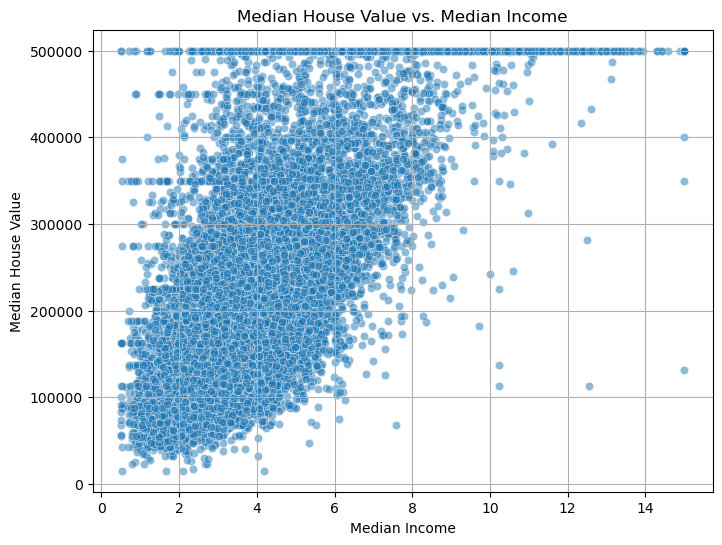

In [13]:
# Scatter plot of Median House Value vs. Median Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='median_income', y='median_house_value', alpha=0.5)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()


In this plot we can see the scatter plot that shows the relationship of median house value which has increased with median income 

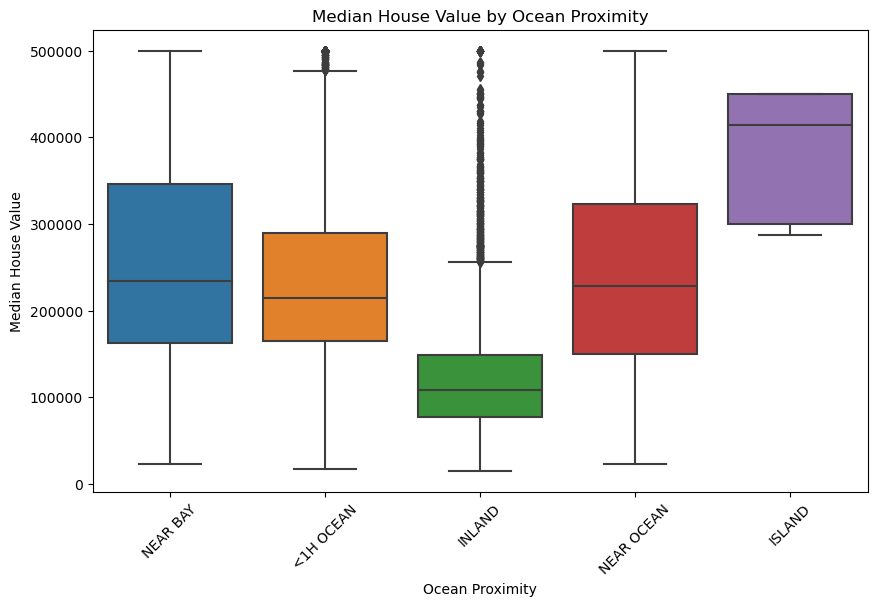

In [14]:
# Box plot of Median House Value by Ocean Proximity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()


This demonstrates the relation between the ocean Proximity and Median house value which is highest in ISLAND and lowest in INLAND

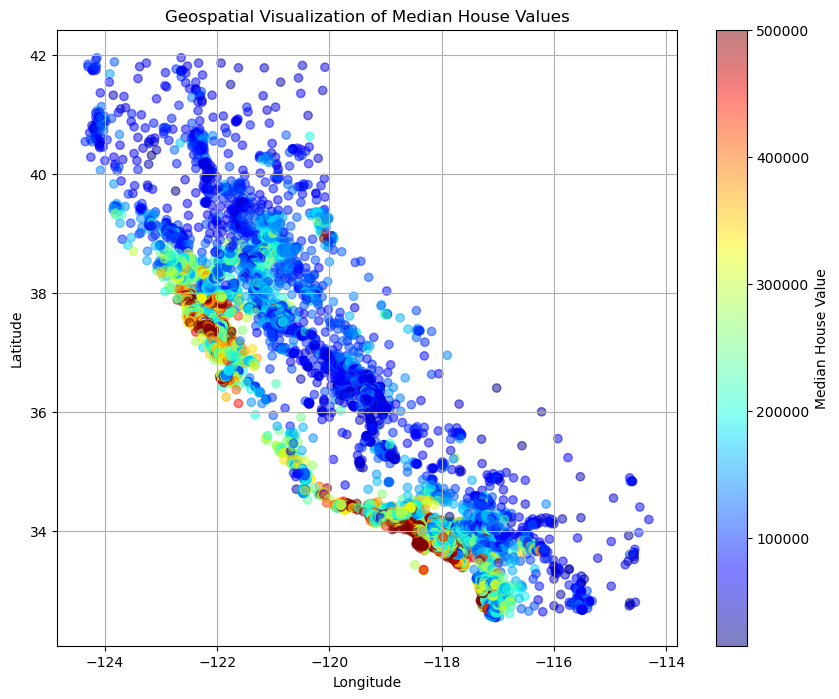

In [15]:
# Define the scatter plot for geospatial visualization
plt.figure(figsize=(10, 8))
plt.scatter(df1['longitude'], df1['latitude'], c=df1['median_house_value'], cmap='jet', alpha=0.5)
plt.colorbar(label='Median House Value')  # Add colorbar to show house values
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Visualization of Median House Values')
plt.grid(True)
plt.show()

This is the geo visulisation of the median house value with respect to the location and this shows the value of the house gets lower as we move towards inland

# Data Modeling

Before Modeling we need to do Feature Scaling to minimize the weight of different data.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Define numerical and binary categorical attributes
num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
               'total_bedrooms', 'population', 'households', 'median_income']
bin_cat_attribs = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 
                   'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 
                   'ocean_proximity_NEAR OCEAN']

# Create numerical pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Create full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs)
])

# Apply the full pipeline to your data
data2 = full_pipeline.fit_transform(df1)

# Print the shape of the prepared data
print("Shape of prepared data:", data2.shape)


Shape of prepared data: (20433, 8)


Since working with the ocean_proximity column had resulted on modeling inacccuracy and due to hight frequency of <1H OCEAN we obmit the column.

We have now preprossed the data

### Devloping models

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(data2, test_size=0.2, random_state=42)

# Splitting the train data into train and validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Printing the shapes of the sets
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (13076, 8)
Validation set shape: (3270, 8)
Test set shape: (4087, 8)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(train_df[:, :-1], train_df[:, -1])

# Make predictions
train_predictions_linear = linear_model.predict(train_df[:, :-1])
val_predictions_linear = linear_model.predict(val_df[:, :-1])
test_predictions_linear = linear_model.predict(test_df[:, :-1])

# Evaluate model performance
train_rmse_linear = mean_squared_error(train_df[:, -1], train_predictions_linear, squared=False)
val_rmse_linear = mean_squared_error(val_df[:, -1], val_predictions_linear, squared=False)
test_rmse_linear = mean_squared_error(test_df[:, -1], test_predictions_linear, squared=False)

train_r2_linear = r2_score(train_df[:, -1], train_predictions_linear)
val_r2_linear = r2_score(val_df[:, -1], val_predictions_linear)
test_r2_linear = r2_score(test_df[:, -1], test_predictions_linear)

print("Linear Regression:")
print("Train RMSE:", train_rmse_linear)
print("Validation RMSE:", val_rmse_linear)
print("Test RMSE:", test_rmse_linear)
print("Train R^2 Score:", train_r2_linear)
print("Validation R^2 Score:", val_r2_linear)
print("Test R^2 Score:", test_r2_linear)


Linear Regression:
Train RMSE: 0.7647188737301662
Validation RMSE: 0.7392076066982356
Test RMSE: 0.762212012523378
Train R^2 Score: 0.4233971493861548
Validation R^2 Score: 0.41580515347189884
Test R^2 Score: 0.4226251468667097


In [19]:
# RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(train_df[:, :-1], train_df[:, -1])

# Make predictions
train_predictions_rf = rf_model.predict(train_df[:, :-1])
val_predictions_rf = rf_model.predict(val_df[:, :-1])
test_predictions_rf = rf_model.predict(test_df[:, :-1])

# Evaluate model performance
train_rmse_rf = mean_squared_error(train_df[:, -1], train_predictions_rf, squared=False)
val_rmse_rf = mean_squared_error(val_df[:, -1], val_predictions_rf, squared=False)
test_rmse_rf = mean_squared_error(test_df[:, -1], test_predictions_rf, squared=False)

train_r2_rf = r2_score(train_df[:, -1], train_predictions_rf)
val_r2_rf = r2_score(val_df[:, -1], val_predictions_rf)
test_r2_rf = r2_score(test_df[:, -1], test_predictions_rf)

print("\nRandom Forest Regressor:")
print("Train RMSE:", train_rmse_rf)
print("Validation RMSE:", val_rmse_rf)
print("Test RMSE:", test_rmse_rf)
print("Train R^2 Score:", train_r2_rf)
print("Validation R^2 Score:", val_r2_rf)
print("Test R^2 Score:", test_r2_rf)



Random Forest Regressor:
Train RMSE: 0.19678106191461425
Validation RMSE: 0.5304370934766166
Test RMSE: 0.5140208163582195
Train R^2 Score: 0.9618196621608381
Validation R^2 Score: 0.6991897432510175
Test R^2 Score: 0.7374163379399522


In [20]:
# GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(train_df[:, :-1], train_df[:, -1])

# Make predictions
train_predictions_gb = gb_model.predict(train_df[:, :-1])
val_predictions_gb = gb_model.predict(val_df[:, :-1])
test_predictions_gb = gb_model.predict(test_df[:, :-1])

# Evaluate model performance
train_rmse_gb = mean_squared_error(train_df[:, -1], train_predictions_gb, squared=False)
val_rmse_gb = mean_squared_error(val_df[:, -1], val_predictions_gb, squared=False)
test_rmse_gb = mean_squared_error(test_df[:, -1], test_predictions_gb, squared=False)

train_r2_gb = r2_score(train_df[:, -1], train_predictions_gb)
val_r2_gb = r2_score(val_df[:, -1], val_predictions_gb)
test_r2_gb = r2_score(test_df[:, -1], test_predictions_gb)

print("\nGradient Boosting Regressor:")
print("Train RMSE:", train_rmse_gb)
print("Validation RMSE:", val_rmse_gb)
print("Test RMSE:", test_rmse_gb)
print("Train R^2 Score:", train_r2_gb)
print("Validation R^2 Score:", val_r2_gb)
print("Test R^2 Score:", test_r2_gb)


Gradient Boosting Regressor:
Train RMSE: 0.5212337332901075
Validation RMSE: 0.5513148221767851
Test RMSE: 0.5535235563256614
Train R^2 Score: 0.732121291428723
Validation R^2 Score: 0.6750442662355933
Test R^2 Score: 0.6955061660216411


In [21]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(train_df[:, :-1], train_df[:, -1])

# Make predictions
train_predictions_dt = dt_model.predict(train_df[:, :-1])
val_predictions_dt = dt_model.predict(val_df[:, :-1])
test_predictions_dt = dt_model.predict(test_df[:, :-1])

# Evaluate model performance
train_rmse_dt = mean_squared_error(train_df[:, -1], train_predictions_dt, squared=False)
val_rmse_dt = mean_squared_error(val_df[:, -1], val_predictions_dt, squared=False)
test_rmse_dt = mean_squared_error(test_df[:, -1], test_predictions_dt, squared=False)

train_r2_dt = r2_score(train_df[:, -1], train_predictions_dt)
val_r2_dt = r2_score(val_df[:, -1], val_predictions_dt)
test_r2_dt = r2_score(test_df[:, -1], test_predictions_dt)

print("\nDecision Tree Regressor:")
print("Train RMSE:", train_rmse_dt)
print("Validation RMSE:", val_rmse_dt)
print("Test RMSE:", test_rmse_dt)
print("Train R^2 Score:", train_r2_dt)
print("Validation R^2 Score:", val_r2_dt)
print("Test R^2 Score:", test_r2_dt)



Decision Tree Regressor:
Train RMSE: 1.345313152798926e-17
Validation RMSE: 0.7175768682813148
Test RMSE: 0.7315368411850147
Train R^2 Score: 1.0
Validation R^2 Score: 0.4494944169827251
Test R^2 Score: 0.4681628235173677


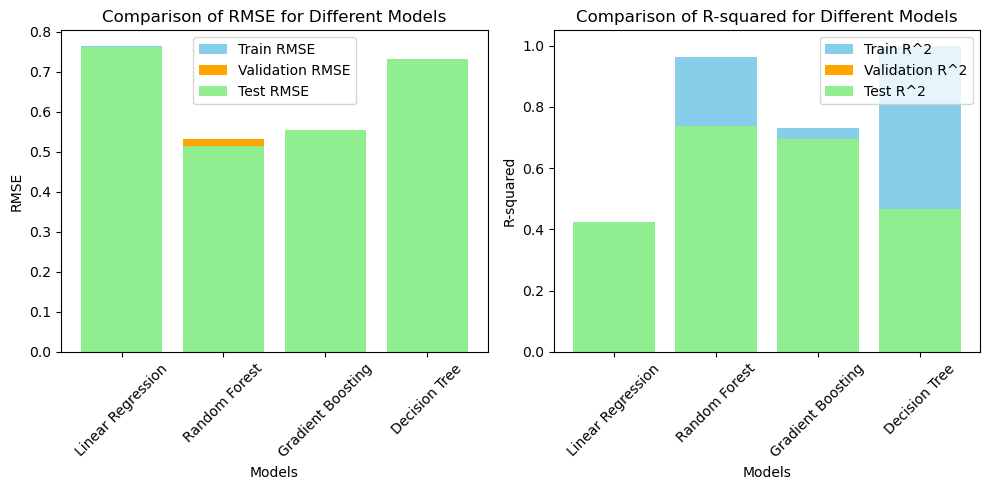

In [22]:
import matplotlib.pyplot as plt

# RMSE values for different models
train_rmse_values = [train_rmse_linear, train_rmse_rf, train_rmse_gb, train_rmse_dt]
val_rmse_values = [val_rmse_linear, val_rmse_rf, val_rmse_gb, val_rmse_dt]
test_rmse_values = [test_rmse_linear, test_rmse_rf, test_rmse_gb, test_rmse_dt]

# R-squared values for different models
train_r2_values = [train_r2_linear, train_r2_rf, train_r2_gb, train_r2_dt]
val_r2_values = [val_r2_linear, val_r2_rf, val_r2_gb, val_r2_dt]
test_r2_values = [test_r2_linear, test_r2_rf, test_r2_gb, test_r2_dt]

# Model names
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree']

# Plotting RMSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, train_rmse_values, color='skyblue', label='Train RMSE')
plt.bar(models, val_rmse_values, color='orange', label='Validation RMSE')
plt.bar(models, test_rmse_values, color='lightgreen', label='Test RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.legend()

# Plotting R-squared
plt.subplot(1, 2, 2)
plt.bar(models, train_r2_values, color='skyblue', label='Train R^2')
plt.bar(models, val_r2_values, color='orange', label='Validation R^2')
plt.bar(models, test_r2_values, color='lightgreen', label='Test R^2')
plt.title('Comparison of R-squared for Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


we have sucessfully developed predictive model to predict housing prices in California using different models